# Diabetes


## Dataset en preprocessing

Wij hebben onze dataset gevonden op kaggle onder de naam: Diabetes prediction dataset. De dataset bestaat uit medische en demografische gegevens van patiënten. In de dataset worden natuurlijk leeftijd en geslacht vermeld en daarnaast nog de bmi, de rookgeschiedenis, het bloedglucose level, het hemoglobine A1c level, de hypertensie, hartziekte en diabetes. De variabelen worden uitgedrukt in getallen in een bepaald interval of met een 0 of 1, oftewel ‘ja’ of ‘nee’, dit wordt gedaan bij hypertensie, hartziekte en diabetes. 

Voor het meeste gebruik van de benodigde data konden wij de data rechtstreeks uit de dataset gebruiken. Wij hebben wel enkele wijzigingen moeten maken voor een betere dataset en dus voor betere visualisaties.
In een staafdiagram tonen we het percentage mannen en vrouwen met diabetes in verschillende leeftijdsintervallen. In eerste instantie hebben we een nieuwe kolom in de dataset gemaakt met de naam ‘Leeftijdscategorieën’. In deze kolom hadden we nieuwe intervallen voor leeftijd gezet. Nu moesten we het percentage van alle mannen en vrouwen met diabetes per totaal berekenen.
Voor de taartdiagram hebben we ook een nieuwe kolom gemaakt, genaamd ‘multi_problems’. Onze dataset bevat twee variabelen: Hartziekte en Hypertensie. Deelnemers kunnen 0 problemen hebben, 1 of 2. Die waarden worden weergegeven in de nieuwe kolom. Nu onderscheiden we de waarden 0,1,2 in elk een enkele groep mensen. 
Voor de bar plot van rookgeschiedenis is een nieuwe variabele gemaakt genaamd rook categorie. Alle mogelijkheden van de variabele rookgeschiedenis zijn onderverdeeld in de juiste categorie en zijn vervolgens in de rook categorie geplaatst. Met deze nieuwe variabele hebben wij de figuur over rookgeschiedenis gemaakt. 


### Perspectief 1: Gezondheidsindicatoren en Diabetes
In dit perspectief zullen we dieper ingaan op de relatie tussen niet beïnvloedbare gezondheidsindicatoren en diabetes. Door de associatie tussen leeftijd, geslacht, hypertensie en hartziekte met de prevalentie en controle van diabetes te onderzoeken, streven we ernaar waardevolle inzichten te verkrijgen. We zullen de dataset analyseren om de prevalentie van deze gezondheidsindicatoren onder mensen met diabetes vast te stellen en hun impact op het beheer van diabetes te verkennen. Met behulp van dit perspectief kunnen we de nadruk leggen op het belang van het aanpakken van comorbiditeiten en het bevorderen van algehele gezondheid om de resultaten van diabetes te verbeteren.


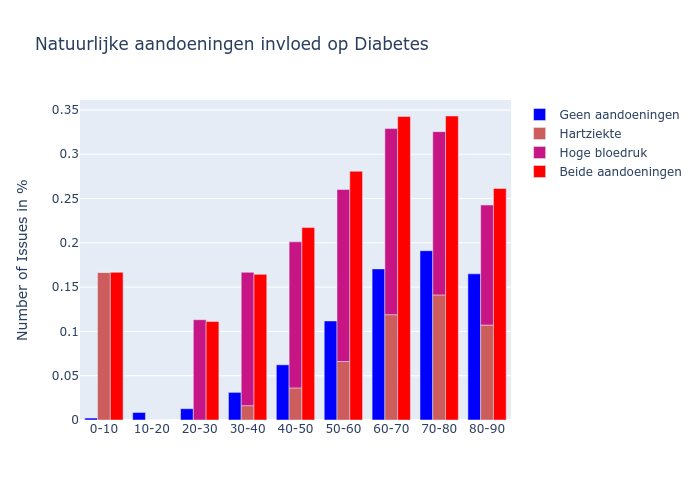

In [1]:
import pandas as pd
import plotly.io as pio
pio.renderers.default = "png"
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

from dash import Dash, html, dcc
from dash.dependencies import Input, Output


import matplotlib.pyplot as plt

df = pd.read_csv('~/Desktop/diabetes_prediction_dataset.csv')
df['leeftijdscategorie'] = np.where(df.age < 10, '0-10',
    np.where(df.age < 20, '10-20',
    np.where(df.age < 30, '20-30', 
    np.where(df.age < 40, '30-40',
    np.where(df.age < 50, '40-50',
    np.where(df.age < 60, '50-60',
    np.where(df.age < 70, '60-70',
    np.where(df.age < 80, '70-80',
    np.where(df.age < 90, '80-90', '>=90'
)))))))))
df['multiproblematic'] = df.hypertension + df.heart_disease 
count_1 = df.loc[df['heart_disease'] == 1, 'diabetes'].eq(1).sum()
count_2 = df.loc[df['hypertension'] == 1, 'diabetes'].eq(1).sum()
count_3 = df.loc[df['multiproblematic'] == 1, 'diabetes'].eq(1).sum()

labels = ['Diabetic', 'Non-diabetic']

# # Create subplots: use 'domain' type for Pie subplot
# fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
#                    subplot_titles = ['2-problems', '1-problem', '0-problems'])
# fig.add_trace(go.Pie(labels=labels, values=[358, 916], name="2-problems", scalegroup="one"),
#               1, 1)
# fig.add_trace(go.Pie(labels=labels, values=[2639,9595], name="1-problem", scalegroup="one"),
#               1, 2)
# fig.add_trace(go.Pie(labels=labels, values=[5503, 89489], name="0-problems", scalegroup="one"),
#               1, 3)

# # Use `hole` to create a donut-like pie chart
# fig.update_traces(
# #     hole=.7,
#     hoverinfo="label+percent+name"
# )

# fig.update_layout(
#     title_text="influence heart disease and hypertension on Diabetes",
# )
# fig.show()
data = {"leeftijdscategorieën": ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'],
"geen_problemen" : [0.0022030945793626395, 0.008483991516008484, 0.0127428616376937, 0.031169640769890126, 0.0622904031394934, 0.11179670670707219, 0.17056402808036794, 0.19106892796016803, 0.16495180331419906],
"hart" : [0.16666666666666666, 0.0, 0.0, 0.016203703703703703, 0.036231884057971016, 0.06601466992665037, 0.11886091621956253, 0.14117043121149897, 0.1071663379355687],
"hyper" : [0.0, 0.0, 0.11320754716981132, 0.15046296296296297, 0.16485507246376813, 0.1941320293398533, 0.2100701609574907, 0.18429158110882957, 0.13543721236028927],
"twee_diabetes" : [0.16666666666666666, 0.0, 0.1111111111111111, 0.1643835616438356, 0.21724137931034482, 0.2807017543859649, 0.342512908777969, 0.34311328443357786, 0.2613240418118467]
       }
fig3 = go.Figure(
    data=[
        go.Bar(
            name="Geen aandoeningen",
            x=data["leeftijdscategorieën"],
            y=data["geen_problemen"],
            offsetgroup=0,
            marker=dict(color='blue')
        ),
        go.Bar(
            name="Hartziekte",
            x=data["leeftijdscategorieën"],
            y=data["hart"],
            offsetgroup=1,
            marker=dict(color='indianred')
        ),
        go.Bar(
            name="Hoge bloedruk",
            x=data["leeftijdscategorieën"],
            y=data["hyper"],
            offsetgroup=1,
            base=data["hart"],
            marker=dict(color='mediumvioletred')
        ),
         go.Bar(
            name="Beide aandoeningen",
            x=data["leeftijdscategorieën"],
            y=data["twee_diabetes"],
            offsetgroup=2,
            marker=dict(color='red')
        )
    ],
    layout=go.Layout(
        title="Natuurlijke aandoeningen invloed op Diabetes",
        yaxis_title="Number of Issues in %"
    )
)

fig3.show()


## Arg 1: Leeftijdsgebonden comorbiditeiten bij diabetes: De last van hypertensie en hartziekte in verschillende leeftijdsgroepen onderzoeken

Hierbij richten we ons op de leeftijdsgebonden comorbiditeiten bij mensen met diabetes, in het bijzonder hypertensie (hoge bloeddruk) en hartziekte. We willen de last van deze aandoeningen onderzoeken en begrijpen hoe deze last varieert tussen verschillende leeftijdsgroepen. Door deze informatie te verzamelen, kunnen we inzichten verkrijgen die van belang zijn voor de diagnose en behandeling van diabetes.


Uit de grafiek blijkt dat naarmate mensen ouder worden, de prevalentie van comorbiditeiten bij diabetes toeneemt. In elke leeftijdscategorie zien we een duidelijk patroon: de bar voor mensen met 2 aandoeningen (hypertensie en hartziekte) is het grootst, gevolgd door de bar voor mensen met 1 aandoening en daarna de bar voor mensen zonder aandoeningen. Dit wijst op een sterke associatie tussen leeftijd en de aanwezigheid van hypertensie en hartziekte bij mensen met diabetes.

Deze bevindingen benadrukken het belang van het monitoren en behandelen van comorbiditeiten, vooral hypertensie en hartziekte, bij oudere patiënten met diabetes. Door deze risicofactoren op basis van leeftijd te identificeren, kunnen we een gerichtere aanpak hanteren bij de diagnose en behandeling.

Het gericht monitoren en effectief behandelen van hypertensie en hartziekte bij oudere patiënten met diabetes kan de algehele gezondheidstoestand verbeteren en het risico op complicaties verminderen. Het is van groot belang om deze bevindingen toe te passen in de klinische praktijk en strategieën te ontwikkelen die zich richten op de preventie en beheersing van comorbiditeiten bij oudere mensen met diabetes.

Door rekening te houden met leeftijdsgerelateerde risicofactoren en het implementeren van geïndividualiseerde zorgplannen, kunnen we een gepersonaliseerde aanpak bieden voor het beheer van diabetes en comorbiditeiten. Dit kan de gezondheidsresultaten van mensen met diabetes verbeteren en de last van comorbiditeiten verminderen, wat uiteindelijk een positieve impact heeft op hun kwaliteit van leven.


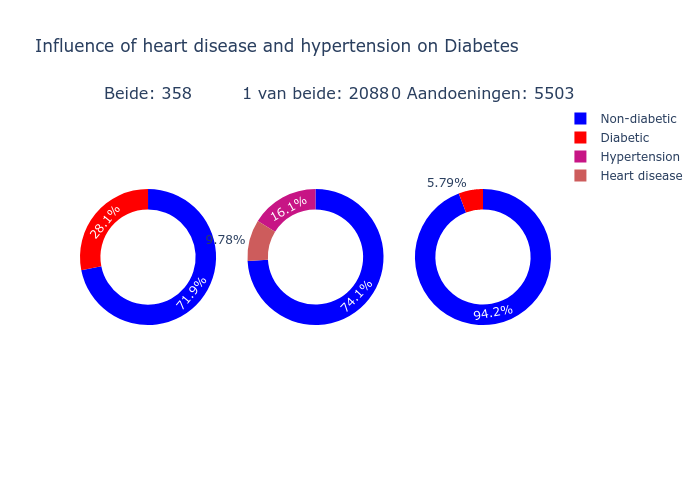

In [2]:
labels = ['Diabetic', 'Non-diabetic']
labels2 = ['Hypertension', 'Heart disease', 'Non-diabetic']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=['Beide: 358', '1 van beide: 2088', '0 Aandoeningen: 5503'])

fig.add_trace(go.Pie(labels=labels, values=[358, 916], marker=dict(colors=['red', 'blue']), name="2-problems"),
              row=1, col=1)

fig.add_trace(go.Pie(labels=labels2, values=[2088, 1267, 9595], marker=dict(colors=['mediumvioletred', 'indianred', 'blue']), name="1-problem"),
              row=1, col=2)

fig.add_trace(go.Pie(labels=labels, values=[5503, 89489], marker=dict(colors=['red', 'blue']), name="0-problems"),
              row=1, col=3)

fig.update_traces(textinfo='percent')

fig.update_traces(hole=0.7, hoverinfo="label+percent+name")

fig.update_layout(title_text="Influence of heart disease and hypertension on Diabetes")

fig.show()


Uit de donutgrafiek kunnen we waardevolle inzichten halen met betrekking tot de relatie tussen het aantal comorbiditeiten en de prevalentie van diabetes. De donutgrafiek bestaat uit drie delen, waarbij elk deel de verdeling van diabetes laat zien binnen specifieke groepen. We kunnen observeren dat naarmate het aantal comorbiditeiten toeneemt, het percentage mensen met diabetes ook stijgt. Dit patroon suggereert een sterke associatie tussen de aanwezigheid van meerdere aandoeningen en het verhoogde risico op diabetes. Deze bevinding ondersteunt het argument dat comorbiditeiten een belangrijke rol spelen bij de diagnose en behandeling van diabetes. Bovendien benadrukt de donutgrafiek het belang van het effectief beheren en behandelen van comorbiditeiten om de diabetes uitkomsten te verbeteren. Het biedt ook inzicht in het potentieel van preventieve maatregelen en geïntegreerde zorgstrategieën om de ontwikkeling van diabetes te voorkomen of te vertragen bij mensen met comorbiditeiten.


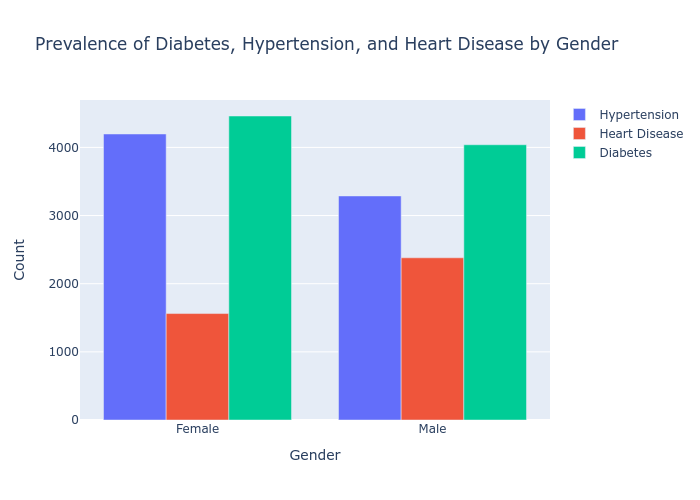

In [3]:

import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from dash import Dash, html, dcc
from dash.dependencies import Input, Output




def show_filtered_plot():
#     test = df[df.leeftijdscategorie == leeftijd]
    test = df
    test = test[test.gender != 'Other']

    # Group the data by gender and calculate the counts for each condition
    grouped = test.groupby('gender')[['hypertension', 'heart_disease', 'diabetes']].sum().reset_index()

    # Define the data for each condition
    data_hypertension = go.Bar(x=grouped['gender'], y=grouped['hypertension'], name='Hypertension')
    data_heart_disease = go.Bar(x=grouped['gender'], y=grouped['heart_disease'], name='Heart Disease')
    data_diabetes = go.Bar(x=grouped['gender'], y=grouped['diabetes'], name='Diabetes')

    # Create the grouped bar chart
    fig = go.Figure(data=[data_hypertension, data_heart_disease, data_diabetes])

    # Customize the chart layout
    fig.update_layout(
        title='Prevalence of Diabetes, Hypertension, and Heart Disease by Gender',
        xaxis=dict(title='Gender'),
        yaxis=dict(title='Count'),
        barmode='group'
    )

    # Show the chart
    return fig


# external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
# app = Dash(__name__, external_stylesheets=external_stylesheets)
# leeftijden = list(df.leeftijdscategorie.sort_values().unique())        

# app.layout = html.Div(id='parent', children=[
#     html.H1(id='H1', children='Diabetes en risicofactoren', style={'textAlign': 'center', 'marginTop': 40, 'marginBottom': 40}),
#     dcc.Graph(id='bars', figure=show_filtered_plot('0-10')),
#     dcc.Slider(
#         min=0,
#         max=len(leeftijden) - 1,
#         step=1,
#         value=1,
#         id='slider-leeftijd',
#         marks={i: cat for i, cat in enumerate(leeftijden)}
#     ),
# ])

# @app.callback(
#     Output('bars', 'figure'),
#     Input('slider-leeftijd', 'value')
# )
# def update_plot(leeftijd):
#     return show_filtered_plot(leeftijden[leeftijd])

# if __name__ == '__main__':
#     app.run_server(debug=True)
show_filtered_plot()

Op jonge leeftijd, is diabetes duidelijk een op zichzelf staand probleem, dat geen samenhang heeft met de andere klachten die zijn bekeken. Op latere leeftijd, nemen hoge bloeddruk, hartziekte en diabetes in hoeveelheid toe. Hoge bloeddruk en diabetes stijgen met de leeftijd ongeveer even hard.
Dan is duidelijk een correlatie tussen de verschillende factoren te zien.

De grafiek is in jupyter-book helaas niet werkend interactief. In de afzonderlijke notebook is dit wel het geval. Hierboven zijn de totalen weergegevens. De interactieve chart geeft de getallen per leeftijdsgroep.

## Arg 2: Geslachtsgebonden verschillen in diabetespreventie wijzen op de invloed van demografische factoren op de diagnose van diabetes.

We willen de verschillen in diabetes prevalentie onderzoeken die geslachtsgebonden zijn omdat het inzicht biedt in de rol van demografische factoren bij de diagnose van diabetes. Door te begrijpen hoe geslacht de prevalentie van diabetes beïnvloedt, kunnen gezondheidsprofessionals gerichtere screenings- en preventiestrategieën ontwikkelen. Bovendien kan het identificeren van demografische factoren die bijdragen aan geslachtsverschillen in diabetes leiden tot meer gender gerichte en gepersonaliseerde benaderingen voor de diagnose, behandeling en beheersing van diabetes, wat kan bijdragen aan een betere gezondheidszorg voor individuen van beide geslachten.


De bar chart onthult opvallende verschillen in diabetesprevalentie tussen beide geslachten. Mannen vertonen bij elke leeftijdscategorie een hogere diabetesprevalentie dan vrouwen. Deze bevinding ondersteunt het argument dat demografische factoren, zoals geslacht, een significante invloed hebben op de diagnose van diabetes. Het wijst op mogelijk biologische, hormonale en sociaaleconomische factoren die bijdragen aan de hogere diabetesprevalentie onder mannen. Het belang van gendergerichte screenings- en preventieprogramma's en aangepaste behandelingen wordt benadrukt. Het identificeren van geslachtsgebonden verschillen in diabetesprevalentie kan leiden tot verbeterde gezondheid strategieën en gepersonaliseerde interventies. Deze bevindingen pleiten voor gendergelijkheid in de gezondheidszorg en benadrukken de noodzaak om de ongelijkheden aan te pakken die bijdragen aan de hogere diabetes last onder mannen. De grafiek biedt overtuigend bewijs dat demografische factoren, met name geslacht, van invloed zijn op de diagnose en behandeling van diabetes, en benadrukt het belang van gender gerichte gezondheidszorg maatregelen.


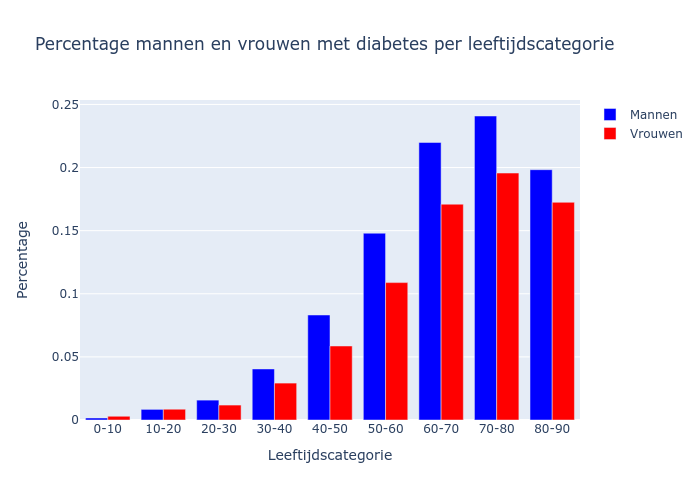

In [4]:
leeftijdscategorieën = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
mannen_diabetes = [0.0015888778550148957, 0.008424599831508003, 0.015755329008341055, 0.04045407636738906, 0.08319068812050667, 0.14799805479007944, 0.21989215098861595, 0.24083457526080476, 0.1982962612399432]
vrouwen_diabetes = [0.0029623360135421074, 0.008540372670807454, 0.011838522552385463, 0.029246892517669997, 0.058628571428571426, 0.10884823380508572, 0.1709729809537871, 0.19562688997441266, 0.1724629418472064]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=leeftijdscategorieën,
    y=mannen_diabetes,
    name='Mannen',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=leeftijdscategorieën,
    y=vrouwen_diabetes,
    name='Vrouwen',
    marker_color='red'
))

fig.update_layout(
    title='Percentage mannen en vrouwen met diabetes per leeftijdscategorie',
    xaxis_title='Leeftijdscategorie',
    yaxis_title='Percentage',
    barmode='group'
)

fig.show()


Net zoals geslacht kan je duidelijk zien dat leeftijd ook een grote impact heeft op diabetes.
Leeftijd speelt een grote rol bij de ontwikkeling van diabetes. Zo hebben mensen na hun 40ste een grote kans op het ontwikkelen van diabetes type 2. Uit de grafiek is dit ook zeer zichtbaar, na interval 30-40 verdubbeld het aantal gevallen bij mannen en groeit het ook bij de vrouwen.

## Perspectief 2: Levensstijlfactoren en Diabetes

In Perspectief 2 zullen we ons richten op de invloed van levensstijlfactoren op het risico en beheer van diabetes. Door de geschiedenis van roken en het niveau van fysieke activiteit te onderzoeken, streven we ernaar te begrijpen hoe deze levensstijlkeuzes bijdragen aan het ontstaan en de controle van diabetes. Door middel van data-analyse kunnen we de associatie tussen levensstijlfactoren en diabetesresultaten blootleggen. Dit perspectief benadrukt het belang van het aannemen van gezonde gedragingen, zoals stoppen met roken en regelmatig fysiek actief zijn, om diabetes effectief te voorkomen en te beheersen. Door de rol van levensstijlveranderingen te benadrukken, kunnen we individuen in staat stellen om geïnformeerde beslissingen te nemen en de regie over hun gezondheid te nemen.

In [5]:

df = pd.read_csv('~/Desktop/diabetes_prediction_dataset.csv')


df['leeftijdscategorie'] = np.where(df.age < 10, '0-10',
    np.where(df.age < 20, '10-20',
    np.where(df.age < 30, '20-30', 
    np.where(df.age < 40, '30-40',
    np.where(df.age < 50, '40-50',
    np.where(df.age < 60, '50-60',
    np.where(df.age < 70, '60-70',
    np.where(df.age < 80, '70-80',
    np.where(df.age < 90, '80-90', '>=90'    
)))))))))
total = df[['leeftijdscategorie', 'diabetes', 'hypertension', 'heart_disease']].groupby(['leeftijdscategorie', 'hypertension', 'heart_disease']).agg(
    {'diabetes': ['sum', 'count']}
)
total.columns = ['_'.join(col) for col in total.columns.values]
total = total.reset_index()
total['percentage'] = total['diabetes_sum'] / total['diabetes_count']
total['num_problems'] = total.hypertension + total.heart_disease
# total = df[['leeftijdscategorie', 'diabetes', 'gender']].groupby(['leeftijdscategorie', 'gender']).agg(
#     {'diabetes': ['sum', 'count']})

# total.columns = ['_'.join(col) for col in total.columns.values]
# total = total.reset_index()
# total['percentage'] = total['diabetes_sum'] / total['diabetes_count']
# total = total[['leeftijdscategorie', 'gender', 'percentage']].pivot_tab

## Perspectief 2: Levensstijlfactoren en Diabetes

In Perspectief 2 zullen we ons richten op de invloed van levensstijlfactoren op het risico en beheer van diabetes. Door de geschiedenis van roken en het niveau van fysieke activiteit te onderzoeken, streven we ernaar te begrijpen hoe deze levensstijlkeuzes bijdragen aan het ontstaan en de controle van diabetes. Door middel van data-analyse kunnen we de associatie tussen levensstijlfactoren en diabetesresultaten blootleggen. Dit perspectief benadrukt het belang van het aannemen van gezonde gedragingen, zoals stoppen met roken en regelmatig fysiek actief zijn, om diabetes effectief te voorkomen en te beheersen. Door de rol van levensstijlveranderingen te benadrukken, kunnen we individuen in staat stellen om geïnformeerde beslissingen te nemen en de regie over hun gezondheid te nemen.

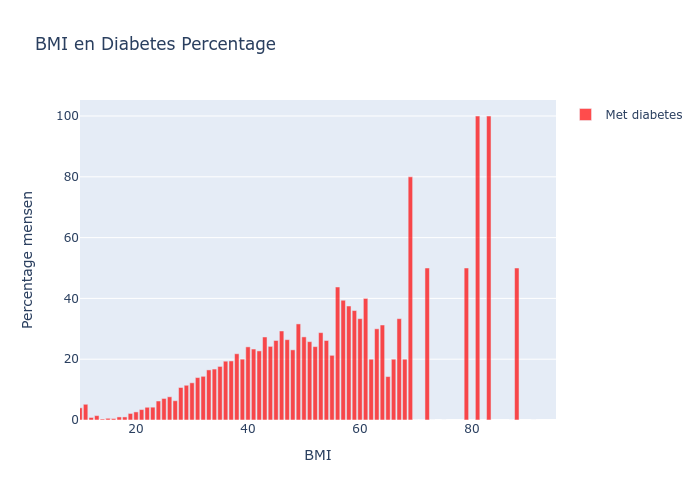

In [6]:
bmi = df['bmi']
diabetes_status = df['diabetes']

# Bepaal de stappen voor de x-as
x_steps = np.arange(10, 96, 1)

# Bereken het totaal aantal personen per BMI-categorie
total_count, _ = np.histogram(bmi, bins=x_steps)

# Bereken het aantal personen met diabetes per BMI-categorie
diabetes_count, _ = np.histogram(bmi[diabetes_status == 1], bins=x_steps)

# Bereken het percentage mensen met diabetes
# diabetes_percentage = np.where(
#     total_count > 0, (diabetes_count / total_count) * 100, 0)

with np.errstate(divide='ignore', invalid='ignore'):
    diabetes_percentage = np.true_divide(diabetes_count,total_count)* 100


# Definieer de staafdiagrammen
trace_diabetes = go.Bar(
    x=x_steps,
    y=diabetes_percentage,
    name='Met diabetes',
    marker=dict(color='red'),
    opacity=0.7
)


# Maak de layout van de grafiek
layout = go.Layout(
    title='BMI en Diabetes Percentage',
    xaxis=dict(title='BMI', range=[10, 95]),
    yaxis=dict(title='Percentage mensen'),
    showlegend=True,
    barmode='group'
)

# Maak een figuur en voeg de staafdiagrammen toe
fig = go.Figure(data=[trace_diabetes], layout=layout)

# Toon het staafdiagram
fig.show()



### Arg 1: De rol van BMI als risicofactor voor diabetes: een grafische analyse

We willen begrijpen wat de relatie tussen BMI en diabetes is. Het is belangrijk om te weten dat hogere BMI-waarden geassocieerd zijn met een verhoogd risico op het ontwikkelen van diabetes. Deze kennis benadrukt het belang van het bevorderen van een gezond gewicht en het nemen van maatregelen om obesitas te voorkomen.



Uit de bar chart die BMI afzet tegen het percentage mensen met diabetes, blijkt een duidelijk verband tussen hogere BMI-waarden en een verhoogd risico op diabetes. De grafiek laat zien dat naarmate BMI stijgt, het percentage mensen met diabetes ook toeneemt. Dit ondersteunt het argument dat lifestylefactoren, zoals overgewicht en obesitas, een significante rol spelen bij het ontstaan en de ontwikkeling van diabetes.

Deze bevinding benadrukt het belang van het bevorderen van gezonde levensstijlkeuzes, met name gericht op het handhaven van een gezond gewicht en het voorkomen van obesitas. Het wijst op de noodzaak van preventieve maatregelen, zoals het bevorderen van lichamelijke activiteit, het verbeteren van de voedingsgewoonten en het bieden van ondersteuning bij gewichtsbeheersing. Door bewustzijn te creëren over de relatie tussen BMI en diabetes, kunnen individuen worden aangemoedigd om proactief te handelen en hun levensstijl aan te passen om het risico op diabetes te verminderen.

Bovendien biedt de bar chart waardevolle informatie voor zorgverleners en beleidsmakers. Het onderstreept de behoefte aan screening en vroegtijdige interventie bij mensen met een verhoogd BMI om de diagnose en behandeling van diabetes te verbeteren. Daarnaast benadrukt het de noodzaak van beleidsmaatregelen gericht op het bevorderen van gezonde voeding en fysieke activiteit in de bredere gemeenschap

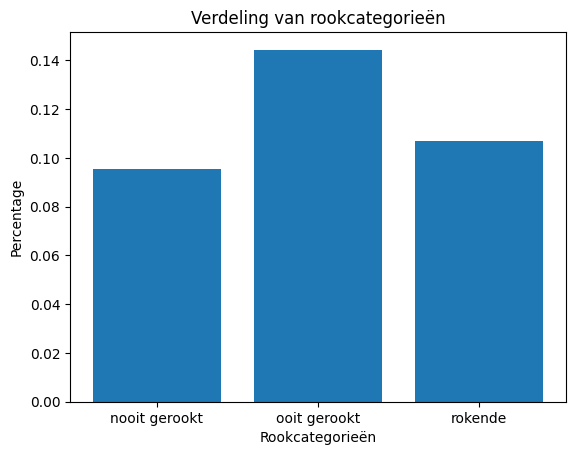

In [7]:
count_never_1 = df.loc[df['smoking_history'] == 'never', 'diabetes'].eq(1).sum()
count_never_0 = df.loc[df['smoking_history'] == 'never', 'diabetes'].eq(0).sum()

total_never = count_never_1+count_never_0 
perc_never = count_never_1/total_never


count_former_1 = df.loc[df['smoking_history'] == 'former', 'diabetes'].eq(1).sum()
count_former_0 = df.loc[df['smoking_history'] == 'former', 'diabetes'].eq(0).sum()
count_notcurrent_1 = df.loc[df['smoking_history'] == 'not current', 'diabetes'].eq(1).sum()
count_notcurrent_0 = df.loc[df['smoking_history'] == 'not current', 'diabetes'].eq(0).sum()

total_oudrokers_1 = count_former_1 + count_notcurrent_1
total_oudrokers_0 = count_former_0 + count_notcurrent_0

total_oudrokers = total_oudrokers_1 + total_oudrokers_0 
perc_oudrokers = total_oudrokers_1 / total_oudrokers


count_ever_1 = df.loc[df['smoking_history'] == 'ever', 'diabetes'].eq(1).sum()
count_ever_0 = df.loc[df['smoking_history'] == 'ever', 'diabetes'].eq(0).sum()
count_current_1 = df.loc[df['smoking_history'] == 'current', 'diabetes'].eq(1).sum()
count_current_0 = df.loc[df['smoking_history'] == 'current', 'diabetes'].eq(0).sum()

total_rokers_1 = count_ever_1 + count_current_1
total_rokers_0 = count_ever_0 + count_current_0

total_rokers = total_rokers_1 + total_rokers_0 
perc_rokers = total_rokers_1 / total_rokers


import matplotlib.pyplot as plt

rookcategorieën = ['nooit gerookt', 'ooit gerookt', 'rokende']
percentages = [0.09534121669753526, 0.1443129311981771, 0.10684725357411588]

plt.bar(rookcategorieën, percentages)
plt.xlabel('Rookcategorieën')
plt.ylabel('Percentage')
plt.title('Verdeling van rookcategorieën')

df['rookcategorie'] = np.where(df['smoking_history'] == 'current', 'rookt',
                              np.where(df['smoking_history'] == 'ever', 'rookt',
                                       np.where(df['smoking_history'] == 'not current', 'ooit gerookt',
                                                np.where(df['smoking_history'] == 'former', 'ooit gerookt',
                                                         np.where(df['smoking_history'] == 'never', 'nooit gerookt',
                                                                  np.where(df['smoking_history'] == 'No Info', 'No Info', 'onbekend')

                                                                           )
                                                                  )
                                                         )
                                                )
                                       )

### Arg 2: Roken speelt geen grote rol op diabetes

Uit onderzoek van het CBR blijkt dat mensen die roken een groter risico op diabetes hebben. Uit onze bar chart zien we eigenlijk het tegenovergestelde. Namelijk dat roken weinig invloed uitoefent op het krijgen van diabetes. Zo kan het dus niet worden gedefinieerd als een factor voor diabetes waar de mens zelf invloed op uitoefent. 

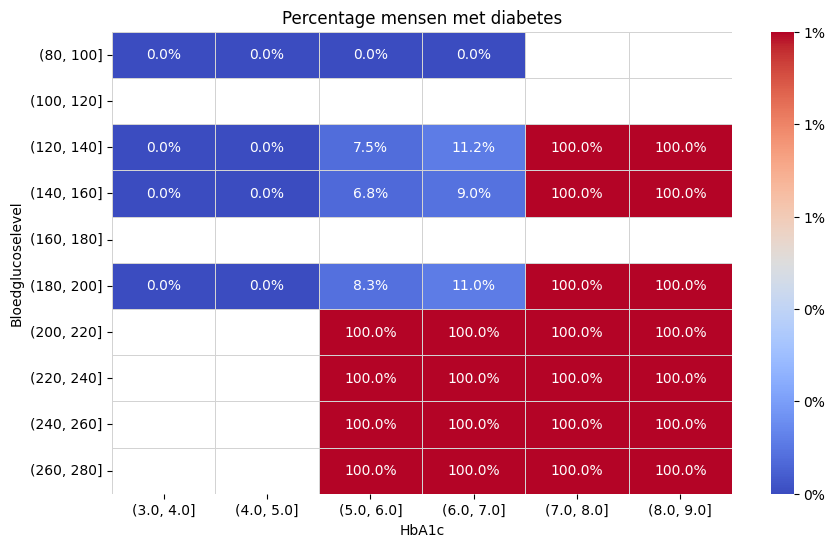

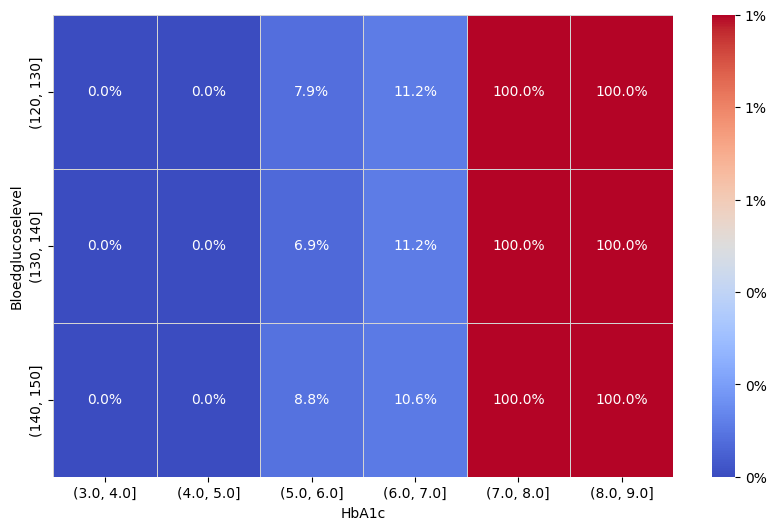

In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('~/Desktop/diabetes_prediction_dataset.csv')



bloedglucoselevel = df['blood_glucose_level']
hbac1 = df['HbA1c_level']
diabetes_status = df['diabetes']

# Combineer de data in een DataFrame
data = pd.DataFrame({'Bloedglucoselevel': bloedglucoselevel, 'HbA1c': hbac1, 'Diabetes': diabetes_status})

# Bepaal de bins voor de heatmap
glucose_bins = np.arange(80, 300, 20)
hba1c_bins = np.arange(3, 9.1, 1)

# Maak de heatmap
plt.figure(figsize=(10, 6))
heatmap_data = data.groupby([pd.cut(data['Bloedglucoselevel'], glucose_bins), pd.cut(data['HbA1c'], hba1c_bins)])['Diabetes'].mean().unstack()
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1%", cbar_kws={'format': '%.0f%%'}, mask=heatmap_data.isnull(), linewidths=0.5, linecolor='lightgray')
plt.xlabel('HbA1c')
plt.ylabel('Bloedglucoselevel')
plt.title('Percentage mensen met diabetes')
plt.show()



import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('~/Desktop/diabetes_prediction_dataset.csv')



bloedglucoselevel = df['blood_glucose_level']
hbac1 = df['HbA1c_level']
diabetes_status = df['diabetes']


data = pd.DataFrame({'Bloedglucoselevel': bloedglucoselevel, 'HbA1c': hbac1, 'Diabetes': diabetes_status})

# Bepaal de bins voor de heatmap
glucose_bins = np.arange(120, 160, 10)
hba1c_bins = np.arange(3, 9.1, 1)

# Maak de heatmap
plt.figure(figsize=(10, 6))
heatmap_data = data.groupby([pd.cut(data['Bloedglucoselevel'], glucose_bins), pd.cut(data['HbA1c'], hba1c_bins)])['Diabetes'].mean().unstack()
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1%", cbar_kws={'format': '%.0f%%'}, mask=heatmap_data.isnull(), linewidths=0.5, linecolor='lightgray')
plt.xlabel('HbA1c')
plt.ylabel('Bloedglucoselevel')
plt.show()

### Arg3: Verband tussen bloedglucose level , hemoglobine A1c level en diabetesrisico.

Het belang van het aannemen van gezonde gedragingen wordt verduidelijkt door de figuur die een duidelijk verband tussen zowel bloedglucose level (y-as) en hemoglobine level (x-as) ten opzichte van diabetes ziet. De hemoglobine waarden lopen van 3,5 tot 9, iedereen onder de 5 heeft geen diabetes en iedereen boven de 7 heeft wel diabetes. De bloedglucosewaarden lopen van 80 tot 300, iedereen onder de 120 heeft geen diabetes en iedereen boven de 200 heeft wel diabetes. Dan is er nog een gebied tussen deze waardes waarin niet iedereen wel of niet diabetes heeft, over dit gebied valt niet veel te zeggen behalve dat hoe hoger de waardes van zowel bloedglucose en hemoglobine hoe groter de kans op diabetes. Aan de hand van deze informatie kunnen er preventie maatregelen genomen worden voor diabetes bij bepaalde patiënten.



## Reflectie

We hebben ervoor gezorgd dat we interactieve plotjes hebben toegevoegd, met behulp van sliders, om de gebruikerservaring te verbeteren en de visualisaties dynamischer te maken. Bovendien hebben we gestreefd naar een consistente stijl voor al onze figuren, zodat de presentatie overzichtelijk en professioneel oogt.

Daarnaast hebben we ons gericht op het duidelijk definiëren van de argumenten die we willen ondersteunen met behulp van de plotjes. We hebben ervoor gezorgd dat de boodschap en het doel van elke visualisatie helder zijn, zodat de lezer gemakkelijk de verbanden en conclusies kan begrijpen.

Om de leesbaarheid te verbeteren, hebben we besloten om de laatste twee onleesbare plotjes te vervangen door meer geschikte grafieken, zoals barplots of heatmaps, die de gegevens beter weergeven en de argumenten ondersteunen.

Met deze aanpassingen hebben we ons gericht op het creëren van visualisaties die onze argumenten duidelijk en effectief ondersteunen. We zijn dankbaar voor de feedback en zijn vastbesloten om ons project tot een succesvolle afronding te brengen.


In [9]:
# import pandas as pd
# from bokeh.plotting import figure, show
# from bokeh.models import ColumnDataSource, CustomJS
# from bokeh.io import output_notebook
# from bokeh.layouts import column
# from bokeh.models.widgets import Select


# def show_filtered_plot(leeftijd):
#     test = df[df.leeftijdscategorie == leeftijd]
#     test = test[test.gender != 'Other']

#     # Group the data by gender and calculate the counts for each condition
#     grouped = test.groupby('gender')[['hypertension', 'heart_disease', 'diabetes']].sum().reset_index()

#     # Create a ColumnDataSource for the grouped data
#     source = ColumnDataSource(grouped)

#     # Define the data for each condition
#     conditions = ['hypertension', 'heart_disease', 'diabetes']
#     colors = ['blue', 'green', 'orange']
#     legend_labels = ['Hypertension', 'Heart Disease', 'Diabetes']

#     # Create the figure and bars for each condition
#     p = figure(x_range=grouped['gender'], outer_width=600, outer_height=400, title='Prevalence of Diabetes, Hypertension, and Heart Disease by Gender')
#     bars = p.vbar_stack(conditions, x='gender', width=0.5, color=colors, legend_label=legend_labels, source=source)

#     # Customize the chart layout
#     p.xaxis.axis_label = 'Gender'
#     p.yaxis.axis_label = 'Count'
#     p.legend.location = 'top_right'
#     p.legend.orientation = 'horizontal'

#     return p

# leeftijden = list(df.leeftijdscategorie.sort_values().unique())

# leeftijd = Select(
#     title='Leeftijdsgroepen',
#     options=leeftijden,
#     value='0-10'
# )

# # Create the interactive plot
# def interactive_plot():
#     p = show_filtered_plot(leeftijd.value)
#     layout.children[1] = p

# leeftijd.js_on_change('value', CustomJS(code="""
#     interactive_plot();
# """))

# # Create the initial plot
# output_notebook()
# p = show_filtered_plot(leeftijd.value)

# # Create the layout
# layout = column(leeftijd, p)

# # Display the layout
# show(layout)


# import ipywidgets as widgets
# from IPython.display import display
# import plotly.graph_objects as go

# def show_filtered_plot(leeftijd):
#     test = df[df.leeftijdscategorie == leeftijd]
#     test = test[test.gender != 'Other']

#     # Group the data by gender and calculate the counts for each condition
#     grouped = test.groupby('gender')[['hypertension', 'heart_disease', 'diabetes']].sum().reset_index()

#     # Define the data for each condition
#     data_hypertension = go.Bar(x=grouped['gender'], y=grouped['hypertension'], name='Hypertension')
#     data_heart_disease = go.Bar(x=grouped['gender'], y=grouped['heart_disease'], name='Heart Disease')
#     data_diabetes = go.Bar(x=grouped['gender'], y=grouped['diabetes'], name='Diabetes')

#     # Create the grouped bar chart
#     fig = go.Figure(data=[data_hypertension, data_heart_disease, data_diabetes])

#     # Customize the chart layout
#     fig.update_layout(
#         title='Prevalence of Diabetes, Hypertension, and Heart Disease by Gender',
#         xaxis=dict(title='Gender'),
#         yaxis=dict(title='Count'),
#         barmode='group'
#     )

#     # Show the chart
#     return fig

# leeftijden = list(df.leeftijdscategorie.sort_values().unique())

# leeftijd = widgets.SelectionSlider(
#     options=leeftijden,
#     value='0-10',
#     description='Leeftijdsgroepen',
#     disabled=False,
#     continuous_update=False,
#     orientation='horizontal',
#     readout=True,
#     layout=widgets.Layout(width='75%')
# )

# # Create a container to hold the chart
# chart_container = widgets.Output()

# def on_leeftijd_change(change):
#     with chart_container:
#         # Clear the previous chart
#         chart_container.clear_output(wait=True)
        
#         # Create and display the new chart
#         fig = show_filtered_plot(change.new)
#         fig.show()

# # Initially display the chart
# initial_fig = show_filtered_plot(leeftijd.value)
# with chart_container:
#     initial_fig.show()

# leeftijd.observe(on_leeftijd_change, 'value')

# # Display the chart and 